# SELF-DISCOVER: Large Language Models Self-Compose Reasoning Structures
[https://arxiv.org/pdf/2402.03620](https://arxiv.org/pdf/2402.03620)    
     
Il paper "**Self-Discover: Large Language Models Self-Compose Reasoning Structures**" presenta un approccio innovativo per migliorare le capacità di ragionamento dei grandi modelli linguistici (LLMs).    
L'approccio, denominato "*Self-Discover*" (auto-scoperta, scoperta di se stessi), consente ai modelli di auto-comporre strutture di ragionamento senza dipendere completamente dagli input umani, migliorando la loro capacità di risolvere problemi complessi. I modelli utilizzano una varietà di moduli di ragionamento predefiniti per analizzare e decomporre i problemi, valutare diverse prospettive e generare soluzioni innovative.    
    
Il modello è stato testato su diversi set di dati, inclusi Big Bench-Hard (BBH) e MATH, mostrando miglioramenti significativi rispetto ai metodi tradizionali. Per esempio, nel BBH, il modello Self-Discover ha superato le prestazioni di GPT-4 e PaLM 2-L in molte attività (come riportato nel paper).    
    
Il metodo Self-Discover apre nuove possibilità per l'automazione del problem-solving in vari settori, migliorando l'autonomia e l'efficacia dei LLMs nella risoluzione di problemi complessi senza la necessità di interventi umani continui, presentando un approccio promettente per l'automazione del ragionamento nei grandi modelli linguistici, con implicazioni potenzialmente significative per il miglioramento delle loro capacità di risoluzione dei problemi e la loro applicabilità in contesti reali.

<br/><br/><br/><br/>
<img src="img/self_discover.png">    
<br/><br/><br/><br/>
<img src="img/self_discover_2.png">
<br/><br/><br/><br/><hr/><br/><br/>
<img src="img/self_discover_3.png">

In [1]:
# from langchain_ollama import ChatOllama
#
# model = ChatOllama(model="deepseek-r1:14b", temperature=0., num_ctx=16384, num_predict=4096)

from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini", temperature=0.)

In [2]:
from langchain.prompts import PromptTemplate

select_prompt = PromptTemplate.from_template("""Select the only reasoning modules needed to solve the assigned task:


All reasoning module descriptions:

{reasoning_modules}


Task:

{task_description}


Selected modules needed to solve the above task:""")

select_prompt.input_variables = ["reasoning_modules", "task_description"]

In [3]:
reasoning_modules = [
    "Fundamental: Create a data structure capable of representing all the information provided.",
    "Actor Perspectives: identify all parties involved in the problem and their relationships with each other. Consider the perspectives of each actor in the task, evaluating how the problem affects each.",
    "Relationship Mapping: identify all relationships between actors, taking account of relationships and memberships within, such as family members, and factor them into calculation.",
    "Metaphor: rewrite the task using a metaphor, to disambiguate the concepts and have a more in-depth understanding of the task",
    "Critical Thinking: analyze the problem from different perspectives or questioning assumptions, and evaluate the evidence or information available.",
    "Creative Thinking: generate innovative and out-of-the-box ideas to solve the problem. Explore unconventional solutions, thinking beyond traditional boundaries, and encouraging imagination and originality.",
    "Experience: are there any potential solutions or strategies that have been tried before? If yes, what were the outcomes and lessons learned?",
    "Metrics and Benchmarks: how can progress or success in solving the problem be measured or evaluated?",
    "Solution Improvement: what is the best way to modify this current best solution, given what you know about these kinds of problem specification?"
    "Constraint Mapping: identify and map all constraints provided by the problem.",
    "Building a Possibility Matrix: create a matrix or grid that includes all information and possible characteristics.",
    "Search for Patterns and Correlations: analyze the distribution of data looking for patterns or correlations that may suggest a direct or indirect relationship between characteristics.",
    "Backtracking and Review: when a path of reasoning leads to a dead end or contradiction, use backtracking to go back and try different choices.",
    "Validation of the Final Solution: check the consistency of the solution with all the constraints and make sure there are no inconsistencies."
    "Hypothesis Testing: develop hypotheses based on the available data and systematically test each one to see if it leads to a valid solution.",
    "Reverse Engineering: start from the known outcomes and work backwards to determine the possible causes. This helps in understanding which conditions must be met for the final outcomes to occur, and can uncover hidden assumptions or missing information.",
    "Iterative Refinement: use an iterative process to refine assumptions and solutions. Start with a broad assumption, test it, and based on the results, refine the assumption to be more specific or alter it until the correct solution is reached.",
    "Dependency Mapping: map out dependencies between variables to see how changes in one affect the others. This helps in understanding the complex interrelationships and can guide decision-making by showing where changes will have the most impact.",
    "Scenario Simulation: simulate different scenarios based on possible combinations of houses, colors, nationalities, and other characteristics. This can reveal new insights by showing how different configurations meet or fail to meet the problem’s conditions.",
    "Counterfactual Thinking: consider how the problem would change if certain key facts were different. This helps in understanding the importance of each piece of information and can highlight critical points that are essential for solving the problem.",
    "Logical Deduction Framework: construct a framework that applies formal logical methods such as propositional logic or predicate logic to deduce relationships or rule out impossibilities in a structured manner.",
    "Pattern Recognition: recognize patterns and commonalities in similar problems or datasets.",
    "Optimization Techniques: apply mathematical optimization techniques to find the best solution that satisfies all conditions, especially when dealing with multiple conflicting constraints or objectives.",
    "Validation and Verification of Assumptions: review and confirm the correctness of assumptions made during the analysis process to ensure that the reasoning is based on accurate and logically consistent premises.",
    "Dividi et Impera: simplifies complex tasks by listing simpler and more easily performed subtasks, then implement it with good notation and explanation.",
    "Mathematical Hallucinations: checks the mathematical calculations performed to limit errors due to incorrect mathematical calculations.",
    "Alternative Routes: try to generate different solutions, validating them individually, in search of the only valid one.",
    "Simplification: try to rewrite the task in such a way that a child can understand it.",
    "Conceptual Clarity: make sure you clearly understand the terms and categories used in the problem. Distinguish between individuals and groups or categories.",
    "Internal Consistency: check that all parts of the reasoning are coherent with each other and that there are no internal contradictions.",
    "Search for Contrary Evidence: look for evidence that contradicts the solution to test its robustness.",
    "Systems Thinking: consider the problem in the context of a larger system to better understand the interrelationships and dynamics involved.",
    "Distinguish between Correlation and Causation: make sure you do not confuse correlation with causation by carefully examining cause-and-effect relationships.",
    "Organizes the Task: generate an information grid that represents all the elements of the task and updates the values step by step.",
    "Concept Map: create a conceptual map of the task and update it step by step until each element has been defined."
]

In [4]:
adapt_prompt = PromptTemplate.from_template("""Reformulate and specify each reasoning module so that it can better help you solve the task:


Descriptions of the SELECTED modules:

{selected_modules}


Task: {task_description}


Adapt the description of each reasoning module to better solve the task:""")

adapt_prompt.input_variables = ["selected_modules", "task_description"]

In [5]:
structured_prompt = PromptTemplate.from_template("""Operationalize the reasoning modules into a step-by-step reasoning plan in JSON format:

Here's an example:

Example task:

If you follow these instructions, do you return to the starting point? Always face forward. Take 1 step backward. Take 9 steps left. Take 2 steps backward. Take 6 steps forward. Take 4 steps forward. Take 4 steps backward. Take 3 steps right.

Example reasoning structure:

{{

    "Position after instruction 1":

    "Position after instruction 2":

    "Position after instruction n":

    "Is final position the same as starting position":

}}


Adapted module description:

{adapted_modules}


Task:

{task_description}


Implement a reasoning structure for solvers to follow step-by-step and arrive at correct answer.

Note: do NOT actually arrive at a conclusion in this pass. 

Your job is to generate a PLAN so that in the future you can fill it out and arrive at the correct conclusion for tasks like this""")

structured_prompt.input_variables = ["adapted_modules", "task_description"]

In [6]:
reasoning_prompt = PromptTemplate.from_template("""Follow the step-by-step reasoning plan in JSON to correctly solve the task.
Fill in the values following the keys by reasoning specifically about the task given.
Do not simply rephrase the keys.


Reasoning Structure:

{reasoning_structure}


Task: {task_description}""")

reasoning_prompt.input_variables = ["reasoning_structure", "task_description"]

In [7]:
answer_prompt = PromptTemplate.from_template("""Given the task description:

{task_description}


and the following description of the reasoning carried out to solve the previous task:

{answer}

generates an appropriate solution to the previous task:""")

answer_prompt.input_variables = ["answer", "task_description"]

In [8]:
from typing import Optional, TypedDict
from langchain_core.output_parsers import StrOutputParser
from langgraph.graph import END, START, StateGraph

class SelfDiscoverState(TypedDict):
    reasoning_modules: str
    task_description: str
    selected_modules: Optional[str]
    adapted_modules: Optional[str]
    reasoning_structure: Optional[str]
    answer: Optional[str]

def select(inputs):
    select_chain = select_prompt | model | StrOutputParser()
    return {"selected_modules": select_chain.invoke(inputs)}


def adapt(inputs):
    adapt_chain = adapt_prompt | model | StrOutputParser()
    return {"adapted_modules": adapt_chain.invoke(inputs)}


def structure(inputs):
    structure_chain = structured_prompt | model | StrOutputParser()
    return {"reasoning_structure": structure_chain.invoke(inputs)}


def reason(inputs):
    reasoning_chain = reasoning_prompt | model | StrOutputParser()
    return {"answer": reasoning_chain.invoke(inputs)}


def answering(inputs):
    answer_chain = answer_prompt | model | StrOutputParser()
    return {"answer": answer_chain.invoke(inputs)}


graph = StateGraph(SelfDiscoverState)

graph.add_node(select)
graph.add_node(adapt)
graph.add_node(structure)
graph.add_node(reason)
graph.add_node(answering)

graph.add_edge(START, "select")
graph.add_edge("select", "adapt")
graph.add_edge("adapt", "structure")
graph.add_edge("structure", "reason")
graph.add_edge("reason", "answering")
graph.add_edge("answering", END)

app = graph.compile()

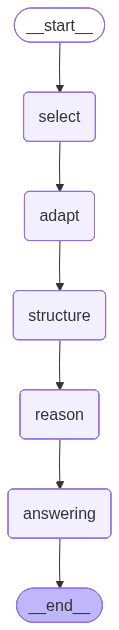

In [9]:
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [10]:
reasoning_modules_str = ""
for i, module in enumerate(reasoning_modules):
    reasoning_modules_str += "* " + module + "\n"
    # reasoning_modules_str += str(i + 1) + ". " + module + "\n"

In [11]:
print(reasoning_modules_str)

* Fundamental: Create a data structure capable of representing all the information provided.
* Actor Perspectives: identify all parties involved in the problem and their relationships with each other. Consider the perspectives of each actor in the task, evaluating how the problem affects each.
* Relationship Mapping: identify all relationships between actors, taking account of relationships and memberships within, such as family members, and factor them into calculation.
* Metaphor: rewrite the task using a metaphor, to disambiguate the concepts and have a more in-depth understanding of the task
* Critical Thinking: analyze the problem from different perspectives or questioning assumptions, and evaluate the evidence or information available.
* Creative Thinking: generate innovative and out-of-the-box ideas to solve the problem. Explore unconventional solutions, thinking beyond traditional boundaries, and encouraging imagination and originality.
* Experience: are there any potential sol

In [12]:
# task_example = "Lisa has 10 apples. Her friend Paul has 10 apples. She gives 3 apples to her friend Paul and then buys 5 more apples from the store. How many apples do Lisa and Paul have now?"

# task_example = """This SVG path element\n<path d="M 55.57,80.69 L 57.38,65.80 M 57.38,65.80 L 48.90,57.46 M 48.90,57.46 L 45.58,47.78 M 45.58,47.78 L 53.25,36.07 L 66.29,48.90 L 78.69,61.09 L 55.57,80.69"/>\ndraws a:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle"""

# task_example = "given a network of points, write the data structure to find the optimal path to go from one point to another and a python script to solve it."

task_example = """In a street there are 5 houses painted in 5 different colors. In each house lives a person of different nationality and each of the hosts drinks a different drink, smokes a different brand of cigarettes, keeps a different pet.


data:
There are five houses.
The Englishman lives in the red house.
The Spaniard owns the dog.
Coffee is drunk in the green house.
Tea is drunk by Ukrainian.
The green house is immediately to the left of the ivory house.
The Old Gold smoker owns snails.
Kools are smoked in the yellow house.
Milk is drunk in the house between.
Norwegian lives in the first house.
The man who smokes Chesterfield lives in the house next to the man with the fox.
The Kools are smoked in the house next to the one where the horse is kept.
Those who smoke Lucky Strikes drink orange juice.
The Japanese smokes Parliament.
The Norwegian lives near the blue house.


task:
Who drinks water?"""

# task_example = """Correctly complete the following syllogism: "Dogs are faithful. Dogs are animals. Therefore ................ are faithful".
# 
# A) all animals
# B) dogs
# C) some dogs
# D) some infidels
# E) some animals"""

# task_example = "Alice has a brother and two sisters. How many sisters does Alice's brother have?"

In [13]:
from langchain.callbacks.tracers import ConsoleCallbackHandler

result = app.invoke({"task_description": task_example, "reasoning_modules": reasoning_modules_str}, config={'callbacks': [ConsoleCallbackHandler()]})

[chain/start] [chain:LangGraph] Entering Chain run with input:
{
  "task_description": "In a street there are 5 houses painted in 5 different colors. In each house lives a person of different nationality and each of the hosts drinks a different drink, smokes a different brand of cigarettes, keeps a different pet.\n\n\ndata:\nThere are five houses.\nThe Englishman lives in the red house.\nThe Spaniard owns the dog.\nCoffee is drunk in the green house.\nTea is drunk by Ukrainian.\nThe green house is immediately to the left of the ivory house.\nThe Old Gold smoker owns snails.\nKools are smoked in the yellow house.\nMilk is drunk in the house between.\nNorwegian lives in the first house.\nThe man who smokes Chesterfield lives in the house next to the man with the fox.\nThe Kools are smoked in the house next to the one where the horse is kept.\nThose who smoke Lucky Strikes drink orange juice.\nThe Japanese smokes Parliament.\nThe Norwegian lives near the blue house.\n\n\ntask:\nWho drinks

In [14]:
print(result["answer"])

The solution to the task of determining who drinks water is as follows:

The Norwegian drinks water. 

This conclusion is reached by analyzing the provided clues and systematically assigning drinks, colors, nationalities, cigarette brands, and pets to each of the five houses. After all other drinks have been accounted for by the other residents, the Norwegian is left as the only person without a specified drink, leading to the deduction that he must drink water. 

Thus, the final answer is:

**The Norwegian drinks water.**


In [15]:
print(result["adapted_modules"])

To enhance the effectiveness of each reasoning module for solving the task of determining who drinks water, we can reformulate and specify the modules as follows:

1. **Data Structure Development**: Design a comprehensive data structure (e.g., a matrix or a list of dictionaries) that encapsulates all relevant attributes for each house, including:
   - House number (1 to 5)
   - Color (red, green, ivory, yellow, blue)
   - Nationality (Englishman, Spaniard, Ukrainian, Norwegian, Japanese)
   - Drink (coffee, tea, milk, orange juice, water)
   - Cigarette brand (Old Gold, Kools, Chesterfield, Lucky Strikes, Parliament)
   - Pet (dog, snails, fox, horse, no pet)
   This structure should allow for easy access and manipulation of data to facilitate reasoning.

2. **Actor Identification and Role Analysis**: Clearly identify the five residents (actors) and their unique attributes. Analyze how each resident's characteristics (nationality, drink, cigarette, pet) interact with one another, focus

In [16]:
print(result["reasoning_structure"])

Here’s a structured reasoning plan in JSON format to operationalize the reasoning modules for the given task of determining who drinks water:

```json
{
    "Data Structure Development": {
        "Houses": [
            {
                "House Number": 1,
                "Color": null,
                "Nationality": null,
                "Drink": null,
                "Cigarette Brand": null,
                "Pet": null
            },
            {
                "House Number": 2,
                "Color": null,
                "Nationality": null,
                "Drink": null,
                "Cigarette Brand": null,
                "Pet": null
            },
            {
                "House Number": 3,
                "Color": null,
                "Nationality": null,
                "Drink": null,
                "Cigarette Brand": null,
                "Pet": null
            },
            {
                "House Number": 4,
                "Color": null,
               

### Hands-on: miglioramenti futuri

Uno dei limiti di questo approccio è di far <u>svolgere tutti i task di ragionamento in contemporanea</u>, proponendoli tutti insieme in un unico prompt al modello di linguaggio.    
Potrebbe essere interessante ciclare su ogni singolo modulo di ragionamento per avere un elenco finale di tanti singoli task di ragionamento specifici.    
Data l'alta richiesta computazionale per un simile task, si potrebbero raggruppare le strutture di ragionamento per attinenza, in modo da ridurre il numero di chiamate totali ai modelli di linguaggio coinvolti e, contemporaneamente, <u>utilizzare differenti modelli (piccoli/locali) per strutture di ragionamento specifiche</u>.